# Task 3- THE SPARKS FOUNDATION

### NAME: Meghana S Sarode

## Unsupervised Learning
## Predict the optimum number of clusters for IRIS dataset and represent it visually

In [1]:
#importing librarires for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#collecting the data
#link = 'http://bit.ly/3kXTdox'
link = 'C:/Users/hp/Downloads/Iris.csv'
data = pd.read_csv(link)

print('--- Data collection successfull ---')


--- Data collection successfull ---


In [3]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Class  
0      0  
1      0  
2      0  
3      0  
4      0  


In [4]:
print(data.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  Class  
145  Iris-virginica      2  
146  Iris-virginica      2  
147  Iris-virginica      2  
148  Iris-virginica      2  
149  Iris-virginica      2  


## Checking for NaN values

In [5]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Class            0
dtype: int64


### There are no NaN values in the dataset.
## Printing the statistical description of the dataset

In [6]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

            Class  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Class          150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None


Since, there are no NaN values in the dataset; we can move forward and check for number of classes of species present in the dataset

## Number of unique classes in the dataset and their description

In [8]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


## Data Visualisation

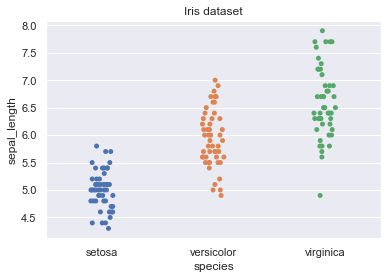

In [9]:
import seaborn as sns

sns.set(style = 'darkgrid')
iris = sns.load_dataset('iris'); 
 
ax = sns.stripplot(x = 'species', y = 'sepal_length', data = iris); 
plt.title('Iris dataset') 
  
plt.show() 

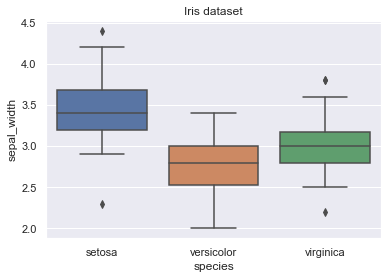

In [10]:
sns.boxplot(x='species', y = 'sepal_width', data=iris)
plt.title("Iris dataset")
plt.show()

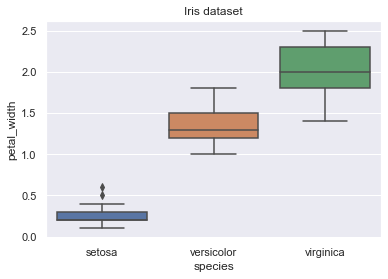

In [11]:
sns.boxplot(x='species', y = 'petal_width', data=iris)
plt.title("Iris dataset")
plt.show()

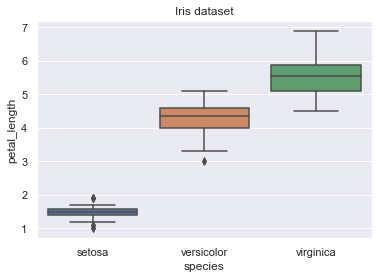

In [12]:
sns.boxplot(x='species', y = 'petal_length', data=iris)
plt.title("Iris dataset")
plt.show()

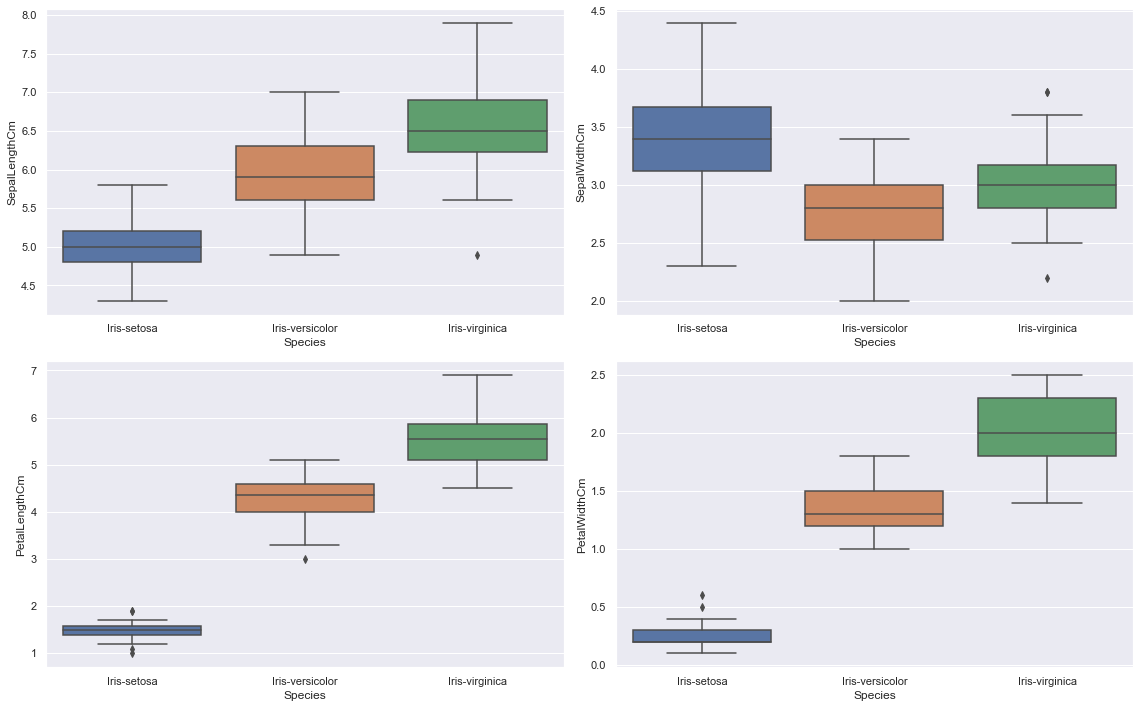

In [13]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
df = data.drop(['Id'], axis=1)
for i in range(4):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

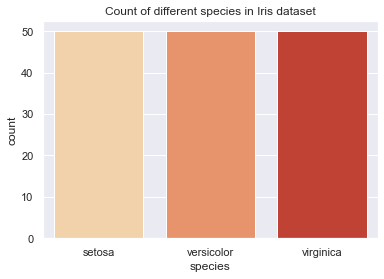

In [14]:
# count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

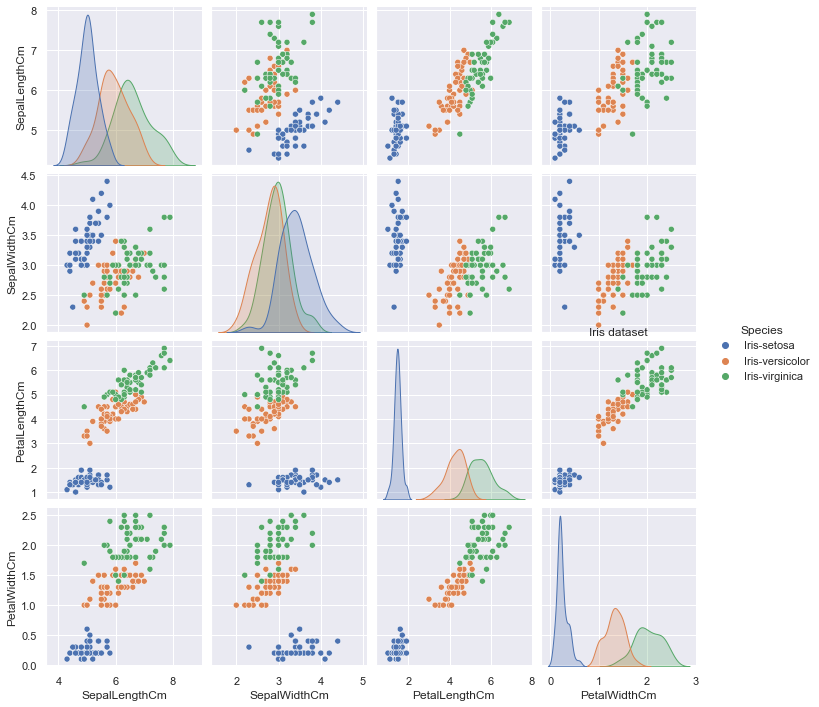

In [15]:
df = data.drop(["Id", "Class"], axis=1)

sns.pairplot(df, hue='Species')
plt.title('Iris dataset')
plt.show()

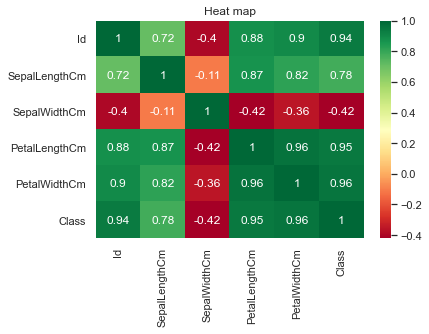

In [16]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.title("Heat map")
plt.show()

##  K-means Algorithm

1. Using feature scaling 

In [17]:
x = data.drop(['Id', 'Species', 'Class'], axis=1)
y = data.Class

print(x.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
data1 = data.iloc[:,1:5].values
#print(data1)

scaled_features = StandardScaler().fit_transform(data1)
#print(scaled_features)

In [19]:
#scaled_features

## Determinig the optimum number of classes using elbow method

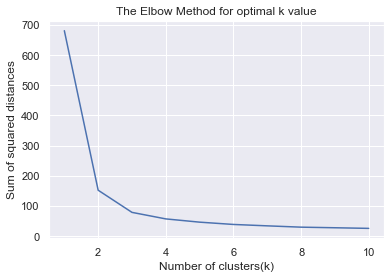

In [20]:
from sklearn.cluster import KMeans


# The location of the bend(knee) in the plot is generally considered as an
# indicator to appropriate number of classes

SSD = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    SSD.append(kmeans.inertia_)
plt.plot(range(1, 11), SSD)
plt.title('The Elbow Method for optimal k value')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of squared distances')
plt.show()

From the elbow graph it is visual that the appropriate number of cluster is 3
### Number of optimum clusters = 3

In [21]:
iris_kmm = KMeans(n_clusters = 3, init='random', max_iter= 500, random_state=42)
iris_kmm.fit(data1)

kmm = KMeans(n_clusters = 3, init='random', max_iter= 500, random_state=42)
kmm.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [22]:
print ("Centroids of unscaled_features = \n",iris_kmm.cluster_centers_, '\n ')
print('centroids of scaled_features = \n', kmm.cluster_centers_)

Centroids of unscaled_features = 
 [[5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]] 
 
centroids of scaled_features = 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]
 [-0.01139555 -0.87288504  0.37688422  0.31165355]]


In [23]:
y_pred = kmm.fit_predict(scaled_features) #prediction for scaled feature set
y_pred_us = iris_kmm.fit_predict(data1) # prediction for unscaled feature set

print("predictions for unscaled_features = \n", y_pred_us, "\n predictions for scaled features = \n", y_pred)

predictions for unscaled_features = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2] 
 predictions for scaled features = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


## Visualization of Clustered groups

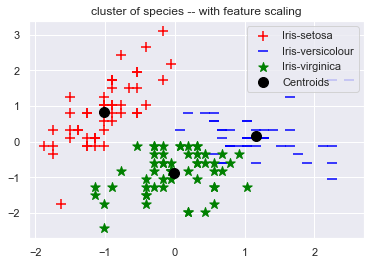

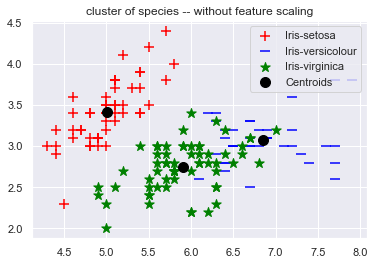

In [24]:
# Plotting the clusters
plt.scatter(scaled_features[y_pred == 0, 0], scaled_features[y_pred == 0, 1], 
            s = 100, c = 'red',marker='+', label = 'Iris-setosa')
plt.scatter(scaled_features[y_pred == 1, 0], scaled_features[y_pred == 1, 1], 
            s = 100, c = 'blue', marker = '_',label = 'Iris-versicolour')
plt.scatter(scaled_features[y_pred == 2, 0], scaled_features[y_pred == 2, 1],
            s = 100, c = 'green', marker='*',label = 'Iris-virginica')

# Plotting the centroid of each cluster
plt.scatter(kmm.cluster_centers_[:, 0], kmm.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()
#plt.grid(True)
plt.title("cluster of species -- with feature scaling")
plt.show()




plt.scatter(data1[y_pred_us == 0, 0], data1[y_pred_us == 0, 1], s = 100, c = 'red',marker='+', label = 'Iris-setosa')
plt.scatter(data1[y_pred_us == 1, 0], data1[y_pred_us == 1, 1], s = 100, c = 'blue', marker = '_',label = 'Iris-versicolour')
plt.scatter(data1[y_pred_us == 2, 0], data1[y_pred_us == 2, 1], s = 100, c = 'green', marker='*',label = 'Iris-virginica')

# Plotting the centroid of each cluster
plt.scatter(iris_kmm.cluster_centers_[:, 0], iris_kmm.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
#plt.grid(True)
plt.title("cluster of species -- without feature scaling")
plt.show()



In [26]:
from sklearn.metrics import accuracy_score
res = accuracy_score(y, y_pred) *100
res1 = accuracy_score(y,y_pred_us)*100
print("Accuracy for unscaled features = {}".format(res1),"\n")
print("Accuracy for scaled features = {}".format(res))

Accuracy for unscaled features = 44.0 

Accuracy for scaled features = 52.0
